In [22]:
import numpy as np
import scipy.integrate as integrate
import math
import random
import matplotlib.pyplot as plt
# from IPython.display import clear_output
PI = math.pi
e = math.e
num_samples = 10000


# generovani nahodnych cisel v rozsahu min-max
def get_rand_number(lower_bound, upper_bound):
    interval = upper_bound - lower_bound
    choice = random.uniform(0, 1)
    return lower_bound + interval*choice


# vysledek pomoci scipy pro porovnani
def scipyResult():
    return integrate.quad(f_of_x, 0, 5)


# kdybychom chteli spocitat napr sinx/x
# WARNING
# je treba zmenit i g(x) jinak IS metoda nebude davat smysl
# def f_of_x(x):
#    return math.sin(x)/x

def f_of_x(x):
    return (e**(-1*x))/(1+(x-1)**2)


# bereme nahodne body z daneho intervalu a v nich vyhodnocujeme funkci f
# vysledek bereme jako prumer vsech  vynasobeny delkou intervalu
def monte_carlo_basic(function, samples):
    # dolni resp. horni meze integralu
    l_bound = 0
    r_bound = 5
    sumSample = 0
    for i in range(samples):
        x = get_rand_number(l_bound, r_bound)
        sumSample += function(x)
    return (r_bound - l_bound) * (sumSample / samples)



1:1: E265 block comment should start with '# '
1: E999 SyntaxError: invalid syntax
3:1: E402 module level import not at top of file
4:1: E402 module level import not at top of file
5:1: E402 module level import not at top of file
6:1: E402 module level import not at top of file
7:1: E402 module level import not at top of file


In [23]:
# funkce g pro IS
def g_of_x(x, A, alpha):
    return A*math.pow(e, -1*alpha*x)


def inverse_G_of_r(r, alpha):
    return (-1 * math.log(r))/alpha


# variance pro Importance sampling o^2 = 1/N*sum(f^2/g^2) - [1/N*sum(f/g)]^2
def get_IS_variance(alpha, num_samples):
    A = alpha
    int_max = 5

    # get sum of squares <I^2>
    sum1 = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        sum1 += (f_of_x(x)/g_of_x(x, A, alpha))**2

    sum_of_sqs = sum1 / num_samples

    # get squared average <I>^2
    sum2 = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        sum2 += f_of_x(x)/g_of_x(x, A, alpha)
    sq_ave = (sum2/num_samples)**2

    return sum_of_sqs - sq_ave


# vytvorime si pole alphas a pro kazdou spocitame varianci, pote najdeme tu nejlepsi = s nejmensi varianci
# test_alphas = 0.05*np.arange(1, 61)
# variances = [get_IS_variance(alpha, num_samples) for alhpa in test_alphas]
test_lamdas = [i*0.05 for i in range(1, 61)]
variances = []

# pro kazde alpha pocitame varianci
for i, alpha in enumerate(test_alphas):
    # kdybychom nahodou chteli vypsat kazde alpha
    # print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
    variances.append(get_IS_variance(alpha, 10000))
    # clear_output(wait=True)

# Najdeme optimalni alpha jako tu s nejmensi varianci
optimal_alpha = test_alphas[np.argmin(np.asarray(variances))]
# jeji variance
IS_variance = variances[np.argmin(np.asarray(variances))]

print(f"Optimal alpha: {optimal_alpha}")
print(f"Optimal Variance: {IS_variance}")
print((IS_variance/10000)**0.5)

# Monte Carlo Importance Sampling
# I~1/N*sum(f(G^-1)/g(G^-1)
def importance_sampling_MC(function, alpha, num_samples):
    A = alpha
    running_total = 0
    for i in range(num_samples):
        r = get_rand_number(0, 1)
        running_total += function(inverse_G_of_r(r, alpha))/g_of_x(inverse_G_of_r(r, alpha), A, alpha)
    approximation = (running_total/num_samples)
    return approximation



Optimal alpha: 1.6500000000000001
Optimal Variance: 0.045320580309860525
0.002128863084133419


33:80: E501 line too long (106 > 79 characters)
57:1: E302 expected 2 blank lines, found 1
62:80: E501 line too long (102 > 79 characters)


Scipy vysledek: (0.6958109540407915, 5.081940164197806e-14)
Monte Carlo s nahodnym vyberem: 0.6991324406253997
Monte Carlo - Importance Sampling : 0.6923318047839231
Variance Importance Sampling: 0.04690716296061237
Error Importance Sampling: 0.0021658061538515484


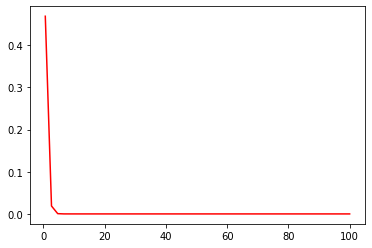

8:80: E501 line too long (81 > 79 characters)
9:80: E501 line too long (99 > 79 characters)
13:1: E265 block comment should start with '# '


In [24]:
# run simulation
num_samples = 10000
approx = importance_sampling_MC(f_of_x, optimal_alpha, num_samples)
variance = get_IS_variance(optimal_alpha, num_samples)
error = (variance/num_samples)**0.5

print(f"Scipy vysledek: {scipyResult()}")
print(f"Monte Carlo s nahodnym vyberem: {monte_carlo_basic(f_of_x,num_samples)}")
print(f"Monte Carlo - Importance Sampling : {importance_sampling_MC(f_of_x, approx, num_samples)}")
print(f"Variance Importance Sampling: {variance}")
print(f"Error Importance Sampling: {error}")

# graf zadane fce
x = np.linspace(0.2 * PI, 100)
plt.plot(x, f_of_x(x), c="red")